In [1]:
##############################################################
##         Part III: Linear Regression
##############################################################

In [2]:
# 3.1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2 = pd.read_csv(r"G:\University of Buffalo\CSE 574\Assignments\Assignment 1\noisy_datasets\emissions_by_country.csv")
df2

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750.0,0.00000,70,55455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751.0,0.00000,66,45101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752.0,0.00000,72,31891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753.0,0.00000,44,35466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754.0,0.00000,21,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017.0,36096.73928,22,32659,14506.97381,12242.62794,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018.0,36826.50660,44,21696,14746.83069,12266.01629,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019.0,37082.55897,78,52918,14725.97803,12345.65337,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020.0,35264.08573,34,39808,14174.56401,11191.80855,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [4]:
df2.isnull().sum().sum()

319695

In [5]:
# 3.2

In [6]:
#Filtering the years
for x in df2.index:
    if df2.loc[x, "Year"] < 1991 or df2.loc[x, "Year"] > 2020:
        df2.drop(x, inplace=True)

df2

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
14,Afghanistan,NaN,NaN,0.000000,31,39073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Afghanistan,AFG,NaN,0.000000,48,51887,NaN,NaN,1398.000000,NaN,NaN,1995.000000,NaN
125,NaN,afg,NaN,2196.000000,43,45795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,Afghanistan,AFG,1991.0,1.914301,63,56235,0.249627,1.204085,0.389125,0.045766,0.025697,NaN,0.178155
242,Afghanistan,AFG,1992.0,1.482054,29,44611,0.021984,1.029584,0.362736,0.045766,0.021984,NaN,0.122916
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63098,Global,WLD,2016.0,35524.193210,55,35776,14360.605250,12023.833280,6973.648992,1487.616801,378.385157,300.103737,4.728065
63099,Global,WLD,2017.0,36096.739280,22,32659,14506.973810,12242.627940,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018.0,36826.506600,44,21696,14746.830690,12266.016290,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019.0,37082.558970,78,52918,14725.978030,12345.653370,7647.528220,1617.506786,439.253991,306.638573,4.775633


In [7]:
df2.describe(include='all')

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,7099,6897,6726.000000,7405.000000,7523.000000,7523.000000,6570.000000,6538.000000,6525.000000,6282.000000,6494.000000,1564.000000,6874.000000
unique,398,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,India,KNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,35,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2005.460898,271.062018,49.317294,39076.417254,141.973034,161.307572,113.573431,48.637390,44.748764,310.679658,72.040203
std,NaN,NaN,8.665817,2010.547540,17.229628,10924.174038,926.614383,819.506788,526.947931,295.985663,298.696390,758.245337,376.823930
min,NaN,NaN,1991.000000,0.000000,20.000000,20007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1998.000000,0.389947,34.000000,29657.500000,0.000000,0.713086,0.000000,0.000000,0.000000,0.563982,0.548077
50%,NaN,NaN,2005.000000,4.565975,49.000000,39117.000000,0.058625,4.058476,0.036640,0.321465,0.000000,1.766967,2.687268
75%,NaN,NaN,2013.000000,48.912715,64.000000,48490.500000,8.049719,29.819408,13.563300,1.865889,0.272566,8.608762,7.222893


In [8]:
df2 = df2.drop_duplicates()
f2 = df2.drop(columns=['ISO 3166-1 alpha-3'], inplace=True)

In [9]:
#df2['Country'] = df2['Country'].replace('slovakia','Slovakia', inplace=True)

counts = df2['Country'].value_counts()
counts

India                35
Paraguay             34
Tunisia              34
Kiribati             33
Sweden               33
                     ..
equatorial guinea     1
MAURITIUS             1
ROMANIA               1
HONDURAS              1
benin                 1
Name: Country, Length: 398, dtype: int64

In [10]:
# Filling the missing years (As it's numerical and in sequence)
#df2['Year'].interpolate(inplace=True)
# Not now

# Filling the missing country names with the previous value
df2['Country'] = df2['Country'].fillna(method='ffill')

for x in df2['Country']:
    y = x.upper()
    df2['Country'].replace(x, y, inplace=True)

df2.reset_index(drop=True, inplace=True)

In [11]:
#Filtering the countries
for x in df2.index:
    if df2.loc[x, "Country"] == 'AUSTRALIA' or df2.loc[x, "Country"] == 'BELARUS' or df2.loc[x, "Country"] == 'BELGIUM' or df2.loc[x, "Country"] == 'FRANCE' or df2.loc[x, "Country"] == 'GREECE' or df2.loc[x, "Country"] == 'HUNGARY' or df2.loc[x, "Country"] == 'ICELAND' or df2.loc[x, "Country"] == 'ITALY' or df2.loc[x, "Country"] == 'JAPAN' or df2.loc[x, "Country"] == 'KAZAKHSTAN' or df2.loc[x, "Country"] == 'USA' or df2.loc[x, "Country"] == 'GLOBAL':
        pass
    else:
        df2.drop(x, inplace=True)

        
df2        

,Country,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
361,AUSTRALIA,NaN,1041.000000,78,57178,1508.000000,1864.000000,2781.000000,NaN,NaN,2664.000000,NaN
362,AUSTRALIA,NaN,0.707152,55,24167,0.707152,NaN,0.000000,NaN,0.000000,NaN,NaN
363,AUSTRALIA,NaN,100.934264,41,55520,63.727952,35.658048,NaN,1.540936,0.000000,2271.000000,9.245287
364,AUSTRALIA,1991.0,279.528510,77,34034,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767
365,AUSTRALIA,1992.0,284.525345,74,32229,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502
...,...,...,...,...,...,...,...,...,...,...,...,...
7518,GLOBAL,2016.0,35524.193210,55,35776,14360.605250,12023.833280,6973.648992,1487.616801,378.385157,300.103737,4.728065
7519,GLOBAL,2017.0,36096.739280,22,32659,14506.973810,12242.627940,7144.928128,1507.923185,391.992176,302.294047,4.749682
7520,GLOBAL,2018.0,36826.506600,44,21696,14746.830690,12266.016290,7529.846784,1569.218392,412.115746,302.478706,4.792753
7521,GLOBAL,2019.0,37082.558970,78,52918,14725.978030,12345.653370,7647.528220,1617.506786,439.253991,306.638573,4.775633


In [12]:
df2.reset_index(drop=True, inplace=True)

In [13]:
df2

,Country,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,AUSTRALIA,NaN,1041.000000,78,57178,1508.000000,1864.000000,2781.000000,NaN,NaN,2664.000000,NaN
1,AUSTRALIA,NaN,0.707152,55,24167,0.707152,NaN,0.000000,NaN,0.000000,NaN,NaN
2,AUSTRALIA,NaN,100.934264,41,55520,63.727952,35.658048,NaN,1.540936,0.000000,2271.000000,9.245287
3,AUSTRALIA,1991.0,279.528510,77,34034,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767
4,AUSTRALIA,1992.0,284.525345,74,32229,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502
...,...,...,...,...,...,...,...,...,...,...,...,...
387,GLOBAL,2016.0,35524.193210,55,35776,14360.605250,12023.833280,6973.648992,1487.616801,378.385157,300.103737,4.728065
388,GLOBAL,2017.0,36096.739280,22,32659,14506.973810,12242.627940,7144.928128,1507.923185,391.992176,302.294047,4.749682
389,GLOBAL,2018.0,36826.506600,44,21696,14746.830690,12266.016290,7529.846784,1569.218392,412.115746,302.478706,4.792753
390,GLOBAL,2019.0,37082.558970,78,52918,14725.978030,12345.653370,7647.528220,1617.506786,439.253991,306.638573,4.775633


In [14]:
#Bad way to split the dataset

# for x in df2.index:
#     if df2.loc[x, "Country"] == 'AUSTRALIA':
#         print(df2.iloc[x].values)

#Good way to split the dataset

grouped = df2.groupby('Country')

df2_aus = grouped.get_group('AUSTRALIA')
df2_belgium = grouped.get_group('BELGIUM')
df2_belarus = grouped.get_group('BELARUS')
df2_hun = grouped.get_group('HUNGARY')
df2_ita = grouped.get_group('ITALY')
df2_kaz = grouped.get_group('KAZAKHSTAN')
df2_jap = grouped.get_group('JAPAN')
df2_gre = grouped.get_group('GREECE')
df2_fra = grouped.get_group('FRANCE')
df2_ice = grouped.get_group('ICELAND')
df2_usa = grouped.get_group('USA')
df2_glo = grouped.get_group('GLOBAL')

#Data Cleaning by Country

#Australia
df2_aus = df2_aus[3:]
df2_aus

#Belgium
df2_belgium = df2_belgium[3:]
df2_belgium

#Belarus
df2_belarus = df2_belarus[7:]
df2_belarus

#Hungary
df2_hun = df2_hun[8:-1]
df2_hun

#Italy
df2_ita = df2_ita[1:-2]
df2_ita['Year'].interpolate(inplace=True)
df2_ita

#Kazakhstan
df2_kaz = df2_kaz[2:-2]
df2_kaz['Year'].interpolate(inplace=True)
df2_kaz

#Japan
df2_jap = df2_jap[3:]
df2_jap['Year'].interpolate(inplace=True) #Normalizing the sequence data
df2_jap

#Greece
df2_gre

#France
df2_fra['Year'].interpolate(inplace=True)
df2_fra

#Iceland
df2_ice = df2_ice[1:]
df2_ice

#USA
df2_usa = df2_usa[4:-1]
df2_usa

#Global
df2_glo = df2_glo[3:]
df2_glo



<ipython-input-14-2c3130ba6a0a>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_fra['Year'].interpolate(inplace=True)


,Country,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
362,GLOBAL,1991.0,23244.80575,32,27216,8604.035333,9723.429325,3909.677268,507.750603,282.964847,216.948371,4.299621
363,GLOBAL,1992.0,22580.02340,73,51450,8399.006350,9226.138958,3958.119661,528.942070,250.482285,217.334077,4.110926
364,GLOBAL,1993.0,22812.89982,49,55779,8500.946752,9232.772870,4067.061088,551.511948,244.055629,216.551533,4.090215
365,GLOBAL,1994.0,22969.49836,54,34024,8548.628481,9265.657084,4102.083232,588.460610,248.053732,216.615219,4.057693
366,GLOBAL,1995.0,23458.71306,51,21502,8793.982796,9363.845279,4209.967591,622.442515,244.935059,223.539824,4.084593
367,GLOBAL,1996.0,24159.38227,36,38012,9015.793678,9643.208497,4395.991935,635.312359,247.174959,221.900844,4.147430
368,GLOBAL,1997.0,24302.58303,31,40185,8967.539839,9786.860718,4412.477760,661.232452,250.793765,223.678493,4.114562
369,GLOBAL,1998.0,24213.26051,62,47529,8725.984770,9883.466872,4484.475325,658.611266,240.252432,220.469848,4.044095
370,GLOBAL,1999.0,24732.38837,57,41222,8855.187209,10112.427160,4621.802576,691.010495,232.748259,219.212667,4.076034
371,GLOBAL,2000.0,25453.62214,64,24105,9203.117603,10302.090590,4731.291034,721.927315,278.928472,216.267121,4.139541


In [15]:
# Fill all NaN with the means
df2_glo.fillna(df2.mean(), inplace=True)
df2_glo
df2_belgium.fillna(df2.mean(), inplace=True)
df2_belgium
df2_belarus.fillna(df2.mean(), inplace=True)
df2_belarus
df2_hun.fillna(df2.mean(), inplace=True)
df2_hun
df2_ita.fillna(df2.mean(), inplace=True)
df2_ita
df2_kaz.fillna(df2.mean(), inplace=True)
df2_kaz

,Country,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
294,KAZAKHSTAN,1991.0,269.489798,78,43740,166.778614,57.253411,26.310939,0.804064,15.676637,2.666133,15.858132
295,KAZAKHSTAN,1992.0,245.215827,59,27757,156.356315,45.962151,25.161586,0.699188,14.679773,2.356813,14.387715
296,KAZAKHSTAN,1993.0,217.963803,35,23063,139.209238,38.299121,23.484133,0.352883,15.228583,1.389844,12.836731
297,KAZAKHSTAN,1994.0,184.332707,49,51382,113.732790,31.887837,22.188472,0.168706,15.480828,0.874075,11.006810
298,KAZAKHSTAN,1995.0,177.082247,68,53815,111.180349,31.772104,17.663143,0.097929,15.639753,0.728968,10.775146
299,KAZAKHSTAN,1996.0,162.760497,76,26365,100.610639,31.070919,15.731992,0.015839,14.771531,0.559577,10.081641
300,KAZAKHSTAN,1997.0,154.166198,46,27720,90.608755,32.565761,14.858660,0.046938,15.470313,0.615771,9.744753
301,KAZAKHSTAN,1998.0,148.818172,42,44659,85.775351,31.974857,14.386611,0.010261,15.498808,1.172285,9.617147
302,KAZAKHSTAN,1999.0,123.721703,33,33786,1200.199318,20.161972,632.186129,147.919778,16.007885,113.802761,76.940120
303,KAZAKHSTAN,2000.0,147.473712,68,48368,90.498794,25.427307,14.152646,0.001999,16.132079,1.260886,9.679133


In [16]:
# Concatinated all the necessary data (Not marging, which is sidewise)

df2 = pd.concat([df2_aus, df2_belgium, df2_belarus, df2_hun, df2_ita, df2_kaz, df2_jap, df2_gre, df2_fra, df2_ice, df2_usa, df2_glo], axis=0)
df2.reset_index(drop=True, inplace=True)
df2

,Country,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,AUSTRALIA,1991.0,279.528510,77,34034,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767
1,AUSTRALIA,1992.0,284.525345,74,32229,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502
2,AUSTRALIA,1993.0,288.870537,21,33179,150.098575,90.386578,35.670002,3.004698,7.136743,2.573941,16.383765
3,AUSTRALIA,1994.0,293.696553,50,26670,151.376241,91.924087,37.032005,3.484276,6.880148,2.999795,16.494706
4,AUSTRALIA,1995.0,305.002996,61,31599,155.718942,96.126544,39.830983,3.357750,7.060714,2.908064,16.941788
...,...,...,...,...,...,...,...,...,...,...,...,...
346,GLOBAL,2016.0,35524.193210,55,35776,14360.605250,12023.833280,6973.648992,1487.616801,378.385157,300.103737,4.728065
347,GLOBAL,2017.0,36096.739280,22,32659,14506.973810,12242.627940,7144.928128,1507.923185,391.992176,302.294047,4.749682
348,GLOBAL,2018.0,36826.506600,44,21696,14746.830690,12266.016290,7529.846784,1569.218392,412.115746,302.478706,4.792753
349,GLOBAL,2019.0,37082.558970,78,52918,14725.978030,12345.653370,7647.528220,1617.506786,439.253991,306.638573,4.775633


In [17]:
# Spotted uncorrelated or unrelated features, then dropped them
df2.corr()
df2.drop(columns = ['Other', 'Flaring', 'GDP Per Capita (USD)', 'Per Capita'], inplace=True) #Kept temperature
df2.corr()

,Year,Total,Temperature,Coal,Oil,Gas,Cement
Year,1.000000,0.052302,-0.009807,0.054405,0.014048,0.063420,0.056612
Total,0.052302,1.000000,-0.015578,0.995452,0.971058,0.980740,0.765564
Temperature,-0.009807,-0.015578,1.000000,-0.016284,-0.013335,-0.025793,-0.025145
Coal,0.054405,0.995452,-0.016284,1.000000,0.959846,0.973783,0.774031
Oil,0.014048,0.971058,-0.013335,0.959846,1.000000,0.983035,0.799117
Gas,0.063420,0.980740,-0.025793,0.973783,0.983035,1.000000,0.796875
Cement,0.056612,0.765564,-0.025145,0.774031,0.799117,0.796875,1.000000


In [18]:
# Datatype to Categorical

df2['Country'] = pd.Categorical(df2['Country'])
df2.dtypes

Country        category
Year            float64
Total           float64
Temperature       int64
Coal            float64
Oil             float64
Gas             float64
Cement          float64
dtype: object

In [19]:
# Normalized

def normalize(column_name):
    minimum = df2[column_name].min()
    maximum = df2[column_name].max()

    normalized_column = (df2[column_name] - minimum) / (maximum - minimum)

    return normalized_column
    
df2['Total'] = normalize('Total')
df2['Temperature'] = normalize('Temperature')
df2['Coal'] = normalize('Coal')
df2['Oil'] = normalize('Oil')
df2['Gas'] = normalize('Gas')
df2['Cement'] = normalize('Cement')

df2 = df2.fillna(df2.mean())

df2

,Country,Year,Total,Temperature,Coal,Oil,Gas,Cement
0,AUSTRALIA,1991.0,0.007482,0.966102,0.009690,0.007009,0.004287,0.001305
1,AUSTRALIA,1992.0,0.007617,0.915254,0.009953,0.006982,0.004442,0.001199
2,AUSTRALIA,1993.0,0.007734,0.016949,0.009956,0.007182,0.004664,0.001232
3,AUSTRALIA,1994.0,0.007864,0.508475,0.010041,0.007307,0.004842,0.001429
4,AUSTRALIA,1995.0,0.008169,0.694915,0.010330,0.007647,0.005208,0.001377
...,...,...,...,...,...,...,...,...
346,GLOBAL,2016.0,0.957973,0.593220,0.954096,0.973929,0.911883,0.609929
347,GLOBAL,2017.0,0.973414,0.033898,0.963821,0.991654,0.934279,0.618255
348,GLOBAL,2018.0,0.993095,0.406780,0.979757,0.993548,0.984612,0.643386
349,GLOBAL,2019.0,1.000000,0.983051,0.978372,1.000000,1.000000,0.663184


In [20]:
df2 = df2.fillna(df2.mode())

In [21]:
df2['Gas'] = df2['Gas'].fillna(df2['Gas'].mode()[0])
df2['Oil'] = df2['Oil'].fillna(df2['Oil'].mode()[0])

In [22]:
# 3.3, 3.4, 3.5

In [23]:
X = df2[['Gas']].values
Y = df2[['Oil']].values

# Splitting into 80:20 ratio for train and test

split_ratio = 0.8

N, d = df2.shape

# Calculated the number of samples for training and testing
num_training_samples = int(N * split_ratio)
num_testing_samples = N - num_training_samples


X_train = X[:num_training_samples, :]
Y_train = Y[:num_training_samples, :]
X_test = X[num_training_samples:, :]
Y_test = Y[num_training_samples:, :]




In [24]:
# 3.6

In [25]:
print("Training (X_train, Y_train):", X_train.shape, Y_train.shape)
print("Test (X_test, Y_test):", X_test.shape, Y_test.shape)

Training (X_train, Y_train): (280, 1) (280, 1)
Test (X_test, Y_test): (71, 1) (71, 1)


In [26]:
reshaped_X_train = X_train.reshape(-1)
reshaped_X_train.shape
reshaped_Y_train = Y_train.reshape(-1)
reshaped_Y_train.shape

(280,)

In [27]:
print(X_train.shape)
print(Y_train.shape)
print(reshaped_X_train.shape)
print(reshaped_Y_train.shape)
type(Y_train)
type(reshaped_X_train)

(280, 1)
(280, 1)
(280,)
(280,)


numpy.ndarray

In [28]:
len(reshaped_Y_train)

280

In [29]:
reshaped_X_train = X_train.reshape(-1)
reshaped_X_train.shape
reshaped_Y_train = Y_train.reshape(-1)
type(reshaped_Y_train)
reshaped_X_train.shape

(280,)

In [30]:
# Gradient Descent to find slope and b

In [31]:
def grad_descent(m_latest, b_latest, L, reshaped_X_train, reshaped_Y_train):
    m_grad = 0
    b_grad = 0
    size = len(reshaped_Y_train)
    
    for i in range (size):
        x = reshaped_X_train[i]
        y = reshaped_Y_train[i]

        m_grad += -(2/size) * x * (y - (m_latest * x + b_latest))
        b_grad += -(2/size) * (y - (m_latest * x + b_latest))

    m = m_latest + m_grad * L
    b = b_latest + b_grad * L
    return m, b

m = 0
b = 0
L = 0.0001
iteration = 400

for i in range(iteration):
    m, b = grad_descent(m, b, L, reshaped_X_train, reshaped_Y_train)
    
    if i % 50 == 0:
        print(f"Iteration {i} done!")
        
    print(f"m = {m} and b = {b}")

Iteration 0 done!
m = -1.2420350890180298e-07 and b = -3.10084683107262e-06
m = -2.4841500752862346e-07 and b = -6.2023141505445115e-06
m = -3.726344974758625e-07 and b = -9.304402082533875e-06
m = -4.968619803392402e-07 and b = -1.240711075118374e-05
m = -6.210974577147956e-07 and b = -1.5510440280661967e-05
m = -7.453409311988873e-07 and b = -1.8614390795161265e-05
m = -8.695924023881931e-07 and b = -2.171896241889917e-05
m = -9.9385187287971e-07 and b = -2.4824155276118076e-05
m = -1.1181193442707552e-06 and b = -2.7929969491085227e-05
m = -1.2423948181589642e-06 and b = -3.103640518809272e-05
m = -1.3666782961422933e-06 and b = -3.414346249145752e-05
m = -1.4909697798190175e-06 and b = -3.7251141525521465e-05
m = -1.615269270787732e-06 and b = -4.035944241465125e-05
m = -1.7395767706473522e-06 and b = -4.346836528323846e-05
m = -1.8638922809971122e-06 and b = -4.657791025569956e-05
m = -1.988215803436567e-06 and b = -4.9688077456475894e-05
m = -2.1125473395655906e-06 and b = -5.279

m = -2.1733052463199438e-05 and b = -0.0005489943462395114
m = -2.185867047439137e-05 and b = -0.0005522050477640368
m = -2.1984296757766897e-05 and b = -0.0005554163917515335
m = -2.2109931314977924e-05 and b = -0.0005586283783305154
m = -2.223557414767668e-05 and b = -0.0005618410076295219
m = -2.2361225257515733e-05 and b = -0.0005650542797771184
m = -2.2486884646147973e-05 and b = -0.0005682681949018958
m = -2.2612552315226625e-05 and b = -0.0005714827531324708
m = -2.2738228266405244e-05 and b = -0.0005746979545974859
m = -2.2863912501337713e-05 and b = -0.0005779137994256091
m = -2.298960502167825e-05 and b = -0.0005811302877455346
m = -2.3115305829081404e-05 and b = -0.0005843474196859817
m = -2.3241014925202052e-05 and b = -0.000587565195375696
m = -2.33667323116954e-05 and b = -0.0005907836149434487
m = -2.3492457990216994e-05 and b = -0.0005940026785180365
m = -2.36181919624227e-05 and b = -0.0005972223862282822
m = -2.3743934229968725e-05 and b = -0.0006004427382030343
m = -

In [32]:
def loss_func(m, b, reshaped_X_train, reshaped_Y_train):
    error = 0.0

    for i in range (len(reshaped_Y_train)):
        x = reshaped_X_train[i]
        y = reshaped_Y_train[i]
        #print(x, y) #Was having issue due to NaN value
        error += (y - (m * x + b))**2
        
    return error / float(len(reshaped_Y_train))

a = loss_func(m, b, reshaped_X_train, reshaped_Y_train)
print(f'Loss Value = {a}')

Loss Value = 0.0009649363381820217


In [33]:
# Reshape X_train and X_test for Linear Reg OLS coeff
X_train2 = X_train.reshape(-1, 1)
X_test2 = X_test.reshape(-1, 1)

reshaped_Y_train.shape

(280,)

In [34]:
# 3.7 (Calculating the weights with the OLS equation)

In [35]:
X_train_with_b = np.c_[np.ones((X_train2.shape[0], 1)), X_train2]
X_test_with_b = np.c_[np.ones((X_test2.shape[0], 1)), X_test2]

# Now computing the OLS coefficients using the formula: w = (X^T*X)^(-1)*X^T*y
#First implementing the small parts of the formula

# X^T*
X_train_transpose = X_train_with_b.T
# X^T*X
XT_X = np.dot(X_train_transpose, X_train_with_b)
# (X^T*X)^(-1)
XT_X_Inv = np.linalg.inv(XT_X)
# X^T*y
XT_y = np.dot(X_train_transpose, reshaped_Y_train)

# Final calculations for the weights (w)
w = np.dot(XT_X_Inv, XT_y)
w

array([0.00900019, 0.50642112])

In [36]:
# Making predictions

In [37]:
y_pred = np.dot(X_test_with_b, w)
y_pred

# print(X_test_with_b)

array([0.0090002 , 0.0090002 , 0.00900019, 0.0090002 , 0.00900019,
       0.00900019, 0.0090002 , 0.00900019, 0.00900019, 0.00900019,
       0.0090002 , 0.0090002 , 0.0780696 , 0.05176412, 0.08248099,
       0.0843238 , 0.08758347, 0.08891408, 0.08942328, 0.0879083 ,
       0.08840509, 0.09192991, 0.0884269 , 0.09104751, 0.08881129,
       0.08764458, 0.08672847, 0.09165109, 0.09198915, 0.09056702,
       0.09445836, 0.09578008, 0.05176412, 0.10239502, 0.10402756,
       0.10674079, 0.10711957, 0.10570768, 0.11619223, 0.1198528 ,
       0.11850712, 0.26789994, 0.2711078 , 0.27832193, 0.28064111,
       0.28778523, 0.30010381, 0.30119551, 0.3059632 , 0.31505704,
       0.3223074 , 0.3251081 , 0.33386697, 0.3454962 , 0.35713255,
       0.36530913, 0.37366239, 0.38606707, 0.39733494, 0.38989594,
       0.41925731, 0.43061795, 0.43947104, 0.44224787, 0.44966641,
       0.17892131, 0.47079687, 0.48213901, 0.50762842, 0.51542131,
       0.50937951])

In [38]:
# 3.8 (Calculating the sum of squared errors)

In [39]:
squared_errors = (Y_test - y_pred) ** 2
mse = np.mean(squared_errors)
mse

0.22319639583195303

In [40]:
# 3.9 (Plotted the predictions vs the actual targets)

Text(0.5, 1.0, 'Predictions vs Actual test data (Linear Reg)')

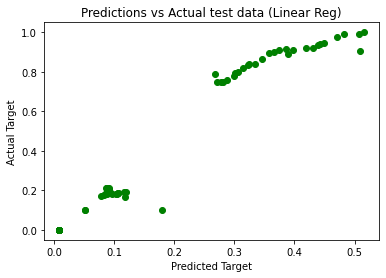

In [41]:
plt.scatter(y_pred, Y_test, color="green")
plt.xlabel("Predicted Target")
plt.ylabel("Actual Target")
plt.title("Predictions vs Actual test data (Linear Reg)")

In [42]:
##############################################################
##         Part IV: Ridge Regression
##############################################################

In [43]:
import numpy as np

def ridge_regression(x, y, lambda_r):
    n_samples, n_features = x.shape

    # (For the bias term) Adding a column of ones to the feature matrix 
    X_train_with_b = np.c_[np.ones((x.shape[0], 1)), x]

    # Computing the Ridge Regression coefficients
    I = np.identity(n_features + 1)
    # w = (X^T * X + lambda_reg * I)^(-1) * X^T * y
    w = np.linalg.inv(X_train_with_b.T.dot(X_train_with_b) + lambda_r * I).dot(X_train_with_b.T).dot(y)

    return w



In [44]:
# Find out weights

In [57]:
X = X_train2
Y = Y_train
lambda_regression = 0.1

w2 = ridge_regression(X, Y, lambda_regression)
print("Estimated Weights:", w2)

Estimated Weights: [[0.01094735]
 [0.35450587]]


In [47]:
# Finding Loss Value

In [48]:
def ridge_loss(X, y, w, lambda_reg):
    n_samples = X.shape[0]
    w = w[1:] 
    predictions = X.dot(w)
    squared_error = np.square(y - predictions).sum()
    regularization_term = lambda_reg * np.dot(w, w)
    loss = (squared_error + regularization_term) / (2.0 * n_samples)
    return loss

# Example usage
X = X_train2
Y = Y_train
lambda_reg = 0.1

# estimated_weights = ridge_regression(X, Y, lambda_reg)
loss = ridge_loss(X, Y, w2, lambda_reg)
print("Loss Value:", loss)

Loss Value: [[0.00032658]]


In [49]:
y_pred_ridge = np.dot(X_test, w2[1])


In [50]:
# Comparing the predictions vs the actual test data

Text(0.5, 1.0, 'Predictions vs Actual test data (Ridge Reg)')

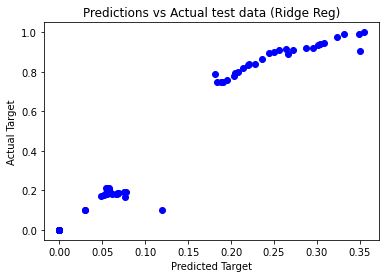

In [51]:
plt.scatter(y_pred_ridge, Y_test, color="blue")
plt.xlabel("Predicted Target")
plt.ylabel("Actual Target")
plt.title("Predictions vs Actual test data (Ridge Reg)")

In [ ]:
# Saving clean data in a csv

In [56]:
from pathlib import Path  
filepath = Path('G:\\University of Buffalo\\CSE 574\\Assignments\\Assignment 1\\Assignment1 Report\\emission_preprocessed.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df2.to_csv(filepath)  

In [ ]:
#y_pred_ridge

In [ ]:
#y_pred

In [60]:
import pickle 

weights_for_3 = {
    'Weight for Linear Reg': w
}
weights_for_4 = {
    'Weight for Ridge Reg': w2
}

pickle.dump(weights_for_3, open( "nsaquib2_assignment1_part3.pickle", "wb" ) )
pickle.dump(weights_for_4, open( "nsaquib2_assignment1_part4.pickle", "wb" ) )

In [61]:
out_3 = pickle.load( open( "nsaquib2_assignment1_part3.pickle", "rb" ) )
out_3

{'Weight for Linear Reg': array([0.00900019, 0.50642112])}

In [62]:
out_4 = pickle.load( open( "nsaquib2_assignment1_part4.pickle", "rb" ) )
out_4

{'Weight for Ridge Reg': array([[0.01094735],
        [0.35450587]])}

In [ ]:
'''
#Reference

1)
https://sparkbyexamples.com/pandas/pandas-drop-first-three-rows-of-a-dataframe/#:~:text=By%20using%20DataFrame.,first%20three%20rows%20from%20DataFrame.

2)
https://www.geeksforgeeks.org/implementation-of-ridge-regression-from-scratch-using-python/

3)
https://saturncloud.io/blog/how-to-split-a-large-pandas-dataframe/#:~:text=One%20way%20to%20split%20a,equal%20or%20near%2Dequal%20size.

'''